<a href="https://colab.research.google.com/github/Maxim687/Machine-learning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_4_%D0%A2%D0%B8%D0%BC%D0%BE%D1%89%D1%83%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Завдання 1
#Попередній аналіз даних
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [ ]:
import pandas as pd

df = pd.DataFrame(X, columns=data.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
print(f"Кількість рядків: {df.shape[0]}")
print(f"Кількість стовпців: {df.shape[1]}")

Кількість рядків: 569
Кількість стовпців: 30


In [ ]:
#Завдання 2
#Розділіть дані на навчальний і тестовий набори.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Завдання 3
#Побудуйте три моделі класифікації (на власний вибір).

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']}
param_grid_tree = {'max_depth': [3, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10, 20]}

grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_search_tree = GridSearchCV(tree_clf, param_grid_tree, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy')

grid_search_lr.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
best_params_tree = grid_search_tree.best_params_
best_params_rf = grid_search_rf.best_params_

best_lr_model = grid_search_lr.best_estimator_
best_tree_model = grid_search_tree.best_estimator_
best_rf_model = grid_search_rf.best_estimator_

y_pred_lr = best_lr_model.predict(X_test)
y_pred_tree = best_tree_model.predict(X_test)
y_pred_rf = best_rf_model.predict(X_test)

print("Найкращі параметри для Логістичної регресії:", best_params_lr)
print("Найкращі параметри для дерева рішень:", best_params_tree)
print("Найкращі параметри для випадкового лісу:", best_params_rf)


Найкращі параметри для Логістичної регресії: {'C': 10, 'solver': 'liblinear'}
Найкращі параметри для дерева рішень: {'max_depth': 5, 'min_samples_split': 10}
Найкращі параметри для випадкового лісу: {'max_depth': 10, 'n_estimators': 50}


Точність логістичної регресії: 0.956140350877193
Точність дерева рішень: 0.9385964912280702
Точність випадкового лісу: 0.956140350877193

Матриця помилок логістичної регресії:


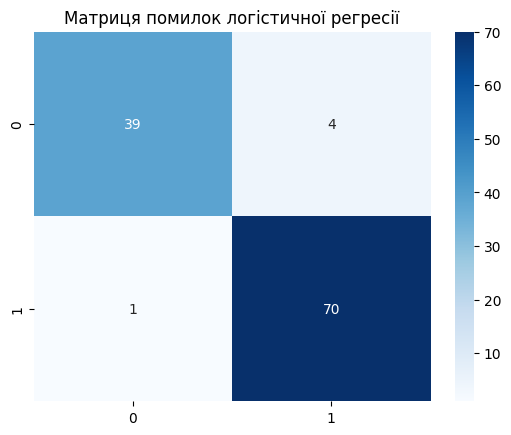


Звіт про класифікацію для логістичної регресії:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Матриця помилок дерева рішень:


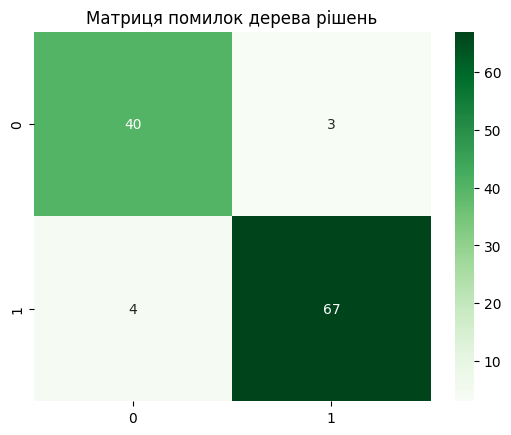


Звіт про класифікацію для дерева рішень:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Матриця помилок випадкового лісу:


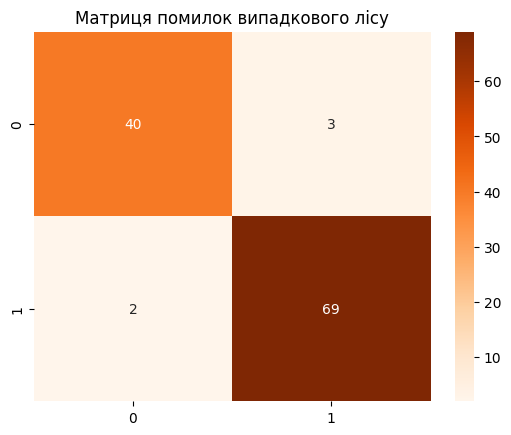


Звіт про класифікацію для випадкового лісу:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
#Завдання 4
#Оцініть моделі. Виведіть точність (accuracy) — обов'язково, матрицюпомилок (confusion matrix) - за вибором та звіт про класифікацію (classification report) для кожної моделі.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("Точність логістичної регресії:", accuracy_score(y_test, y_pred_lr))
print("Точність дерева рішень:", accuracy_score(y_test, y_pred_tree))
print("Точність випадкового лісу:", accuracy_score(y_test, y_pred_rf))

print("\nМатриця помилок логістичної регресії:")
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця помилок логістичної регресії')
plt.show()

print("\nЗвіт про класифікацію для логістичної регресії:")
print(classification_report(y_test, y_pred_lr))

print("\nМатриця помилок дерева рішень:")
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Greens')
plt.title('Матриця помилок дерева рішень')
plt.show()

print("\nЗвіт про класифікацію для дерева рішень:")
print(classification_report(y_test, y_pred_tree))

print("\nМатриця помилок випадкового лісу:")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Oranges')
plt.title('Матриця помилок випадкового лісу')
plt.show()

print("\nЗвіт про класифікацію для випадкового лісу:")
print(classification_report(y_test, y_pred_rf))

#Завдання 5
Пронозування та висновки.

На основі результатів:
*   Точність логістичної регресії та випадкового лісу однакова (0.956), проте дерево рішень має дещо нижчу точність (0.939).
*   Звіт про класифікацію:
Логістична регресія та випадковий ліс мають дуже схожі метрики — високу точність (precision), повноту (recall) та F1-міру, особливо для класу 1.
Випадковий ліс показує трохи вищу точність для класу 0 (0.95) у порівнянні з логістичною регресією (0.97 для класу 1, але 0.93 для класу 0).

Найкраща модель: Випадковий ліс.
Ця модель має трохи кращу збалансованість у прогнозуванні обох класів.





In [ ]:
print("Прогноз на тестовій вибірці (випадковий ліс):")
print(y_pred_rf)

Прогноз на тестовій вибірці (випадковий ліс):
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]
